# (Ford GoBike System Data Visualization)
## by (Hanan Alshehri)


## Table of Contents
- [Preliminary Wrangling](#Preliminary_Wrangling)
- [Univariate Exploration](#Univariate_Exploration)
- [Bivariate Exploration](#Bivariate_Exploration)
- [Multivariate Exploration](#Multivariate_Exploration)

<a id='Preliminary_Wrangling'></a>
## Preliminary Wrangling

> San Francisco Ford GoBike , managed by Motivate, provides the Bay Area’s bike share system. Bike share is a convenient, healthy, affordable, and fun form of transportation. The dataset contains trip data from 2013-2018, including start time, end time, start station, end station, and latitude/longitude for each station.

**To get started, let's import our libraries.**

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in my dataset and describe its properties through the questions below.

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
112472,831,2017-11-21 16:37:58.3370,2017-11-21 16:51:49.4770,182,19th Street BART Station,37.809013,-122.268247,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,33,Subscriber
96764,826,2017-11-28 16:13:58.1970,2017-11-28 16:27:44.8820,88,11th St at Bryant St,37.770030,-122.411726,26,1st St at Folsom St,37.787290,-122.394380,1816,Subscriber
203307,395,2017-10-25 22:03:01.4910,2017-10-25 22:09:36.5500,195,Bay Pl at Vernon St,37.812314,-122.260779,180,Telegraph Ave at 23rd St,37.812678,-122.268773,2350,Subscriber
490653,1571,2017-07-22 11:58:20.6320,2017-07-22 12:24:31.9200,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,6,The Embarcadero at Sansome St,37.804770,-122.403234,928,Customer
402378,610,2017-08-28 09:55:37.6780,2017-08-28 10:05:48.0340,58,Market St at 10th St,37.776619,-122.417385,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1732,Subscriber


In [4]:
df.shape

(519700, 13)

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object

In [6]:
df.isnull().any(axis = 1).sum()

0

In [7]:
df.duplicated().sum()

0

### What is the structure of the dataset?
> The dataset includes 519700 trips and 13 variables which most of them are number value (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id and user_type). This dataset is clean (No duplication and No null values).

### What is/are the main feature(s) of interest in my dataset?

>**1-** The most service months. <br> **2-** The ride duration distribution. <br> **3-** The relationship between trip duration and seasons.<br> **4-** The relationship between variables.<br> **5-** The length of ride for subscribers and customers.<br> **6-** The daily usage for customers and subscribers.

### What features in the dataset I think will help support my investigation into my feature(s) of interest?

>**1-** user_type <br> **2-** duration_sec<br> **3-** month/day

### Clean The Data


#### As I said before, this dataset is clean, so in this section, I will just convert the datatypes to the perfect one. Also, I will add some needed columns.

First, I will take a copy of the data to clean them

In [8]:
df_copy = df.copy()

**<span style="color:purple">Define</span>**

**Erroneous datatypes: "start_station_id, end_station_id, bike_id, start_time and end_time":** Change it to more appropriate datatype.

**<span style="color:purple">Code</span>**

In [9]:
#Convert start_station_id, end_station_id, bike_id to String:
df_copy['start_station_id'] = df_copy['start_station_id'].astype(str)
df_copy['end_station_id'] = df_copy['end_station_id'].astype(str)
df_copy['bike_id'] = df_copy['bike_id'].astype(str)

#Convert start_time and end_time to Datetime:
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

**<span style="color:purple">Test</span>**

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

**<span style="color:purple">Define</span>**

**Because I need months/days for my investigation points above":** Extract months/days from start_time.

**<span style="color:purple">Code</span>**

In [11]:
#Extract start time month:
df_copy['month']=df_copy['start_time'].dt.strftime('%B')

#Extract start time day:
df_copy['day']=df_copy['start_time'].dt.strftime('%a')

**<span style="color:purple">Test</span>**

In [12]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,day
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,December,Sun
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,December,Sun
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,December,Sun
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,December,Sun
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,December,Sun


<a id='Univariate_Exploration'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables.

**Here I want to know the distribution of Ford GoBike Users.**

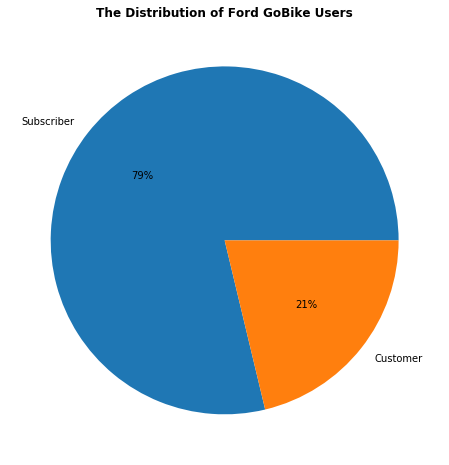

In [13]:
usercounts = df_copy['user_type'].value_counts()
pltlabels=usercounts.index

plt.figure(figsize=[10,8]) #To make a big plot
plt.pie(usercounts, labels=pltlabels, autopct='%1.0f%%') #Set "autopct" to show statistic
plt.title("The Distribution of Ford GoBike Users", fontsize=12, fontweight='semibold')
plt.show();

<span style="color:red">**As we see, 79% of the users are subscribers.**</span>

#### 1. The most service months.

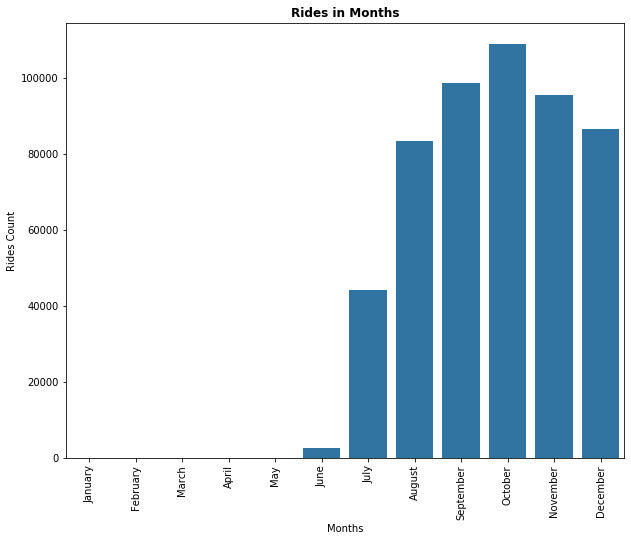

In [14]:
#Create two variables for month and user type
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                 'September', 'October', 'November', 'December']

plt.figure(figsize=[10,8]) #To make a big plot
sb.countplot(data = df_copy, x='month', order=months, color=sb.color_palette()[0])

plt.title('Rides in Months', fontsize=12, fontweight='semibold')
plt.xlabel('Months')
plt.ylabel('Rides Count')
plt.xticks(rotation = 90) #For x-axis: to be clear
plt.show();

<span style="color:red">**The chart shows the October month has the most number of rides.**</span>

#### 2. The ride duration distribution.

In [15]:
#Before going to next step, I want to see some info about duration_sec:
df['duration_sec'].describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

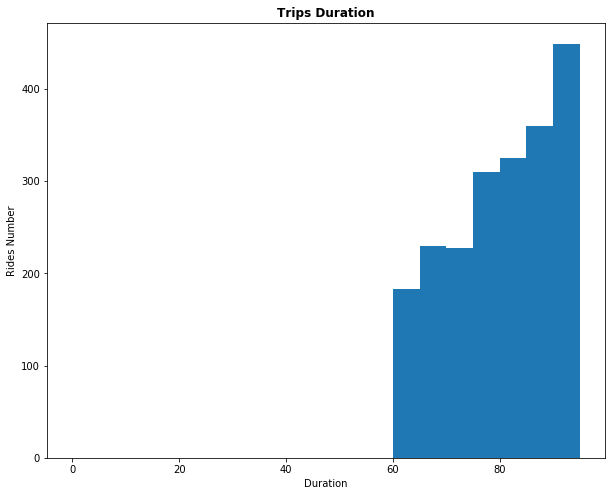

In [16]:
DurationBins=np.arange(0, 100, 5) #To make skewed

plt.figure(figsize=[10,8]) #To make a big plot
plt.hist(data=df_copy, x='duration_sec', bins=DurationBins)

plt.title("Trips Duration", fontsize=12, fontweight='semibold')
plt.xlabel('Duration')
plt.ylabel('Rides Number')
plt.show();

<span style="color:red">**The histogram shows there are no less 60 seconds rides, so the distribution is left-skewed(negatively skewed). Here we need some log transformation (because the mean of trip duration looks like normally distributed).**</span>

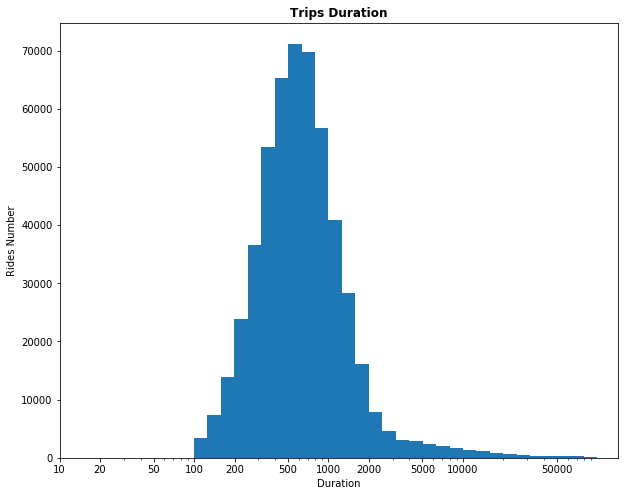

In [17]:
LogBins = 10**np.arange( 2 , 5+0.1 , 0.1)

#To make it readable:
xrange=[10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 50000]
xlabels = ['{}'.format(x) for x in xrange]

plt.figure(figsize=[10,8]) #To make a big plot
plt.hist(data=df_copy, x='duration_sec', bins=LogBins);

plt.xscale('log'); #Log transformation
plt.xticks(xrange,xlabels);

plt.title("Trips Duration", fontsize=12, fontweight='semibold')
plt.xlabel('Duration')
plt.ylabel('Rides Number')
plt.show();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As we see at the previous one, I needed a log transformation to make the duration_sec normally distributed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data was clean and tidy, but to be more appropriate datatypes I have changed some of them in clean section.

<a id='Bivariate_Exploration'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in my data.

#### 3. The relationship between trip duration and seasons.

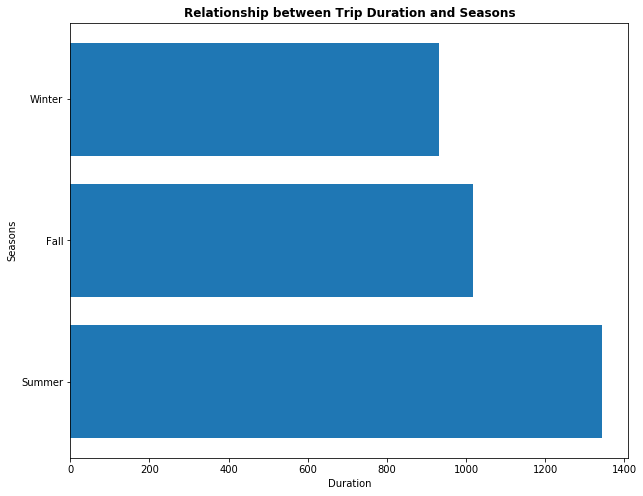

In [18]:
#First, I will create variables for seasons:
summer = df_copy.query('month in ["June" , "July" , "August"] ').duration_sec.mean() #take mean to make better visualization
fall = df_copy.query('month in ["September" , "November" , "December"] ').duration_sec.mean()
winter = df_copy.query('month in ["December" , "January" , "February"]' ).duration_sec.mean()
spring = df_copy.query('month in ["March" , "April" , "May"]' ).duration_sec.mean()

#Now make a plot:
plt.figure(figsize=[10,8]) #To make a big plot
plt.barh(['Summer','Fall','Winter','Spring'],[summer,fall,winter,spring])

plt.title("Relationship between Trip Duration and Seasons", fontsize=12, fontweight='semibold')
plt.xlabel("Duration")
plt.ylabel("Seasons")
plt.show();

<span style="color:red">**The plot shows that the weather has an effect on the trip duration, and the top of them is summer.**

#### 4. The relationship between variables.

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

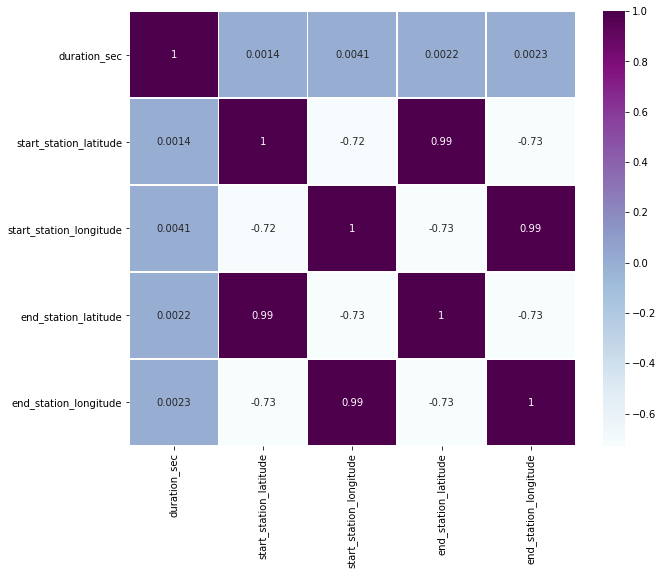

In [20]:
#I will use the heatmap because it's the perfect plot to show a correlation:
plt.subplots(figsize=(10,8)) #To make a big plot
sb.heatmap(df_copy.corr(), annot=True, cmap="BuPu", linecolor='white', linewidths=.5)

plt.show();

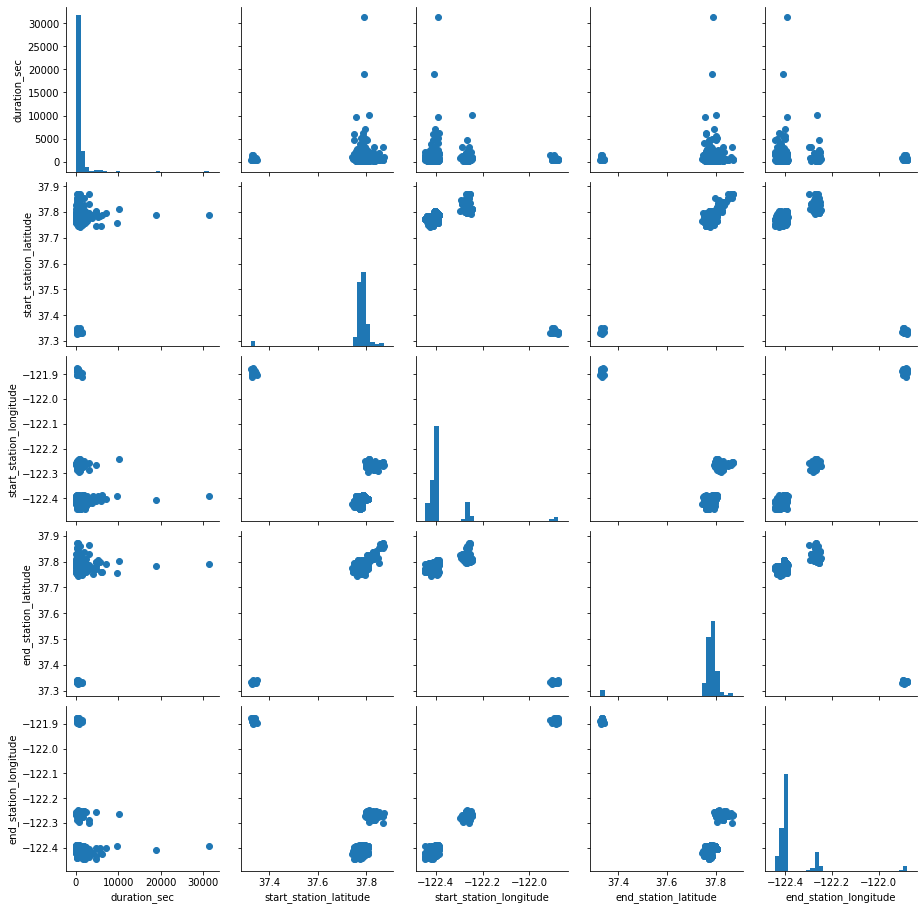

In [21]:
#Put all numeric variable together: 
numeric=['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']

#Take random sample:
random_samp=np.random.choice(df_copy.shape[0], 500, replace = False) 
df_samp=df_copy.loc[random_samp,:]

data=sb.PairGrid(data=df_samp, vars=numeric) #I want a PairGrid Map
data=data.map_diag(plt.hist, bins=30);
data.map_offdiag(plt.scatter);

<span style="color:red">**As we see, the darker one is stronger, but there is a lot of negative correlation!**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was interesting to observe the season has an effect on trips, although it is slightly different between winter and fall, there are many people who like summer trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a strong relationship between start_station_longitude and end_station_longitude, I think many people do not bike to a long-distance.

<a id='Multivariate_Exploration'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate my data even
further.

#### 5. The length of ride for subscribers and customers.

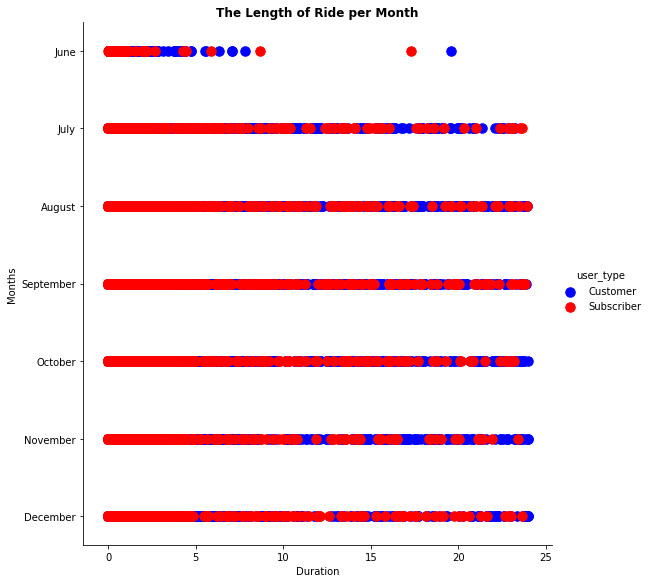

In [22]:
color={'color': ['b', 'r']} #To set color for plot
df_copy['duration_hours'] = df_copy['duration_sec'] / 3600 #I want it in hours

data=sb.FacetGrid(data=df_copy, hue='user_type', hue_kws=color, height=8)
data.map(plt.scatter,'duration_hours','month', s=90).add_legend(); #Use "add_legend()": to appear the labels
data.set_titles("{col_name}") #To set title for plots


plt.title('The Length of Ride per Month', fontsize=12, fontweight='semibold');
plt.ylabel("Months")
plt.xlabel("Duration")

plt.show();

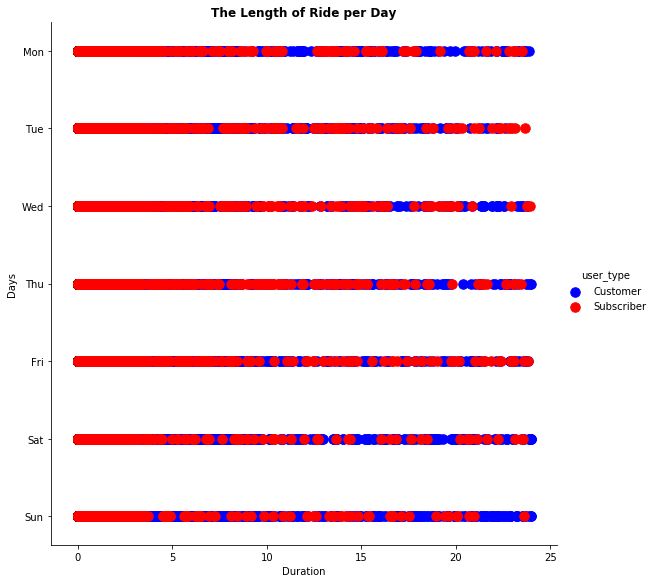

In [23]:
color={'color': ['b', 'r']} #To set color for plot
df_copy['duration_hours'] = df_copy['duration_sec'] / 3600 #I want it in hours

data=sb.FacetGrid(data=df_copy, hue='user_type', hue_kws=color, height=8)
data.map(plt.scatter,'duration_hours','day', s=90).add_legend(); #Use "add_legend()": to appear the labels
data.set_titles("{col_name}") #To set title for plots

plt.title('The Length of Ride per Day', fontsize=12, fontweight='semibold');
plt.ylabel("Days")
plt.xlabel("Duration")

plt.show();

<span style="color:red">**The scatter plot indicates that the customer through months or days has a little longer trips than the subscriber.**

#### 6. The daily usage for customers and subscribers.

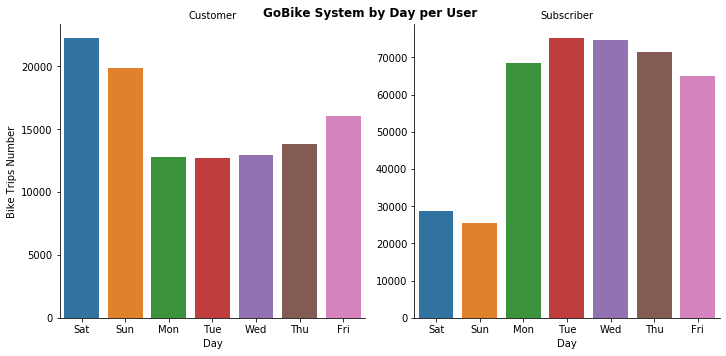

In [24]:
days = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

data = sb.catplot(data=df_copy, x='day', col="user_type", kind='count', sharey=False, order=days) #Set "sharey" to false be more accurate
data.set_axis_labels("Day", "Bike Trips Number")
data.set_titles("{col_name}") #To set title for plots

data.fig.suptitle('GoBike System by Day per User', fontsize=12, fontweight='semibold');

<span style="color:red">**These charts show that most customers use GoBike on the weekends, while most subscribers ride it from Monday to Friday.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate charts strengthened the earlier relationships that were observed: "This Time is for Bike!". A biker likes the summer season so he is riding for more hours in high-temperature months than others.

### Were there any interesting or surprising interactions between features?

> It was surprising to note that the customers through months/days have longer trips, but I think because they are riding it at the weekend (No work so have more time).